<h1>Jamaica Stock Exchange Analysis  </h1>
<p> Basic anslysis data sciences information </p>
<ul> <li> Currently calculation using Simple Rate of Return </li>
<li> Adjustment of split stocks 2017-2018</li>
<li> Add Portfolio </li>
</ul>
<p><b> #Todo </b><i>Adjust for dividends to stock analysis</i></p>
<p><b> #Todo </b><i> Risk calculation </i></p>
<p><b> #Todo </b><i> Regression on stocks </i></p>
<p>&copy; 2018 Romayne Whyte (Ijasoft) <p>



In [49]:
import pandas as pd
import numpy as np
import os
import datetime 
import matplotlib.pyplot as plt
from scipy import linalg

<h2>Pulling Informtion from CSV Files</h2>

In [50]:
#Pull the valid stock information
slist = []
filelist = os.listdir('c:/project/stockcsv/')
for filename in filelist:
    slist.append(pd.read_csv('c:/project/stockcsv/'+filename))
    
frame = pd.concat(slist, axis = 0, ignore_index = True)
frame = frame.sort_values(by='Date')
frame.head()

,Symbol,Date,52 Week High,52 Week Low,Previous Year Div,Current Year Div,Volume (non block),Today High,Today Low,Last Traded,Close Price,Price Change,Closing Bid,Closing Ask
161892,CWJ,2008-01-02,2.0,0.13,NaN,NaN,166310.0,0.67,0.66,0.66,0.66,0.02,0.66,0.68
161908,SVL,2008-01-02,5.0,1.60,NaN,NaN,32000.0,2.40,2.40,2.40,2.40,-0.43,2.38,2.40
161907,SLJ,2008-01-02,11.3,6.60,NaN,NaN,20189.0,8.15,8.00,8.00,8.00,0.00,8.00,8.15
161906,SGJ,2008-01-02,34.0,16.15,NaN,NaN,41066.0,21.05,21.05,21.05,21.05,-0.25,21.05,21.45
161905,RJR,2008-01-02,5.6,1.00,NaN,NaN,55340.0,3.30,3.27,3.27,3.27,-0.13,3.30,3.63


In [51]:
#Pull the list of delisted to remove from stock frame
framevalid = pd.read_csv('c:/project/stockdelist/stockvalid.csv')
framevalid = framevalid.rename(columns={'Instrument Code': 'Symbol'})
framevalid.head()

,Name,Symbol,Currency,Sector,Type,Website
0,138 STUDENT LIVING JAMAICA LIMITED,138SL,JMD,OTHER,ORDINARY,-
1,138 STUDENT LIVING JAMAICA LIMITED VARIABLE PR...,138SLVR,JMD,OTHER,PREFERENCE,-
2,1834 INVESTMENTS LIMITED,1834,JMD,COMMUNICATIONS,ORDINARY,Website
3,BARITA INVESTMENTS LIMITED,BIL,JMD,FINANCE,ORDINARY,Website
4,BERGER PAINTS JAMAICA LTD.,BRG,JMD,MANUFACTURING,ORDINARY,Website


In [52]:
slist = []
slist.append(pd.read_csv('c:/project/stocksplit/corporate-actions (1).csv'))
slist.append(pd.read_csv('c:/project/stocksplit/corporate-actions (2).csv'))
df_info = pd.concat(slist, axis = 0, ignore_index = True)
df_info.head()

,Symbol,Record Date,Action,Dividend Amount,Ex-Date,Payment Date
0,EPLY,12/4/2018,NaN,0.037200,12/3/2018,12/18/2018
1,1834,12/3/2018,NaN,0.100000,11/30/2018,12/19/2018
2,JMMBGL7.50,11/30/2018,NaN,0.004635,11/29/2018,12/14/2018
3,JMMBGL7.25,11/30/2018,NaN,0.006953,11/29/2018,12/14/2018
4,SIL,11/27/2018,Stock Split,5.000000,11/26/2018,NaN


In [53]:
#Pull the valid stock Indicies

slist = []
filelist = os.listdir('c:/project/stockindicies/')
for filename in filelist:
    slist.append(pd.read_csv('c:/project/stockindicies/'+filename))
    
stkindices_frame = pd.concat(slist, axis = 0, ignore_index = True)
stkindices_frame = stkindices_frame.dropna(axis=0)
stkindices_frame

,Index,Date,Value,Change ($),Change (%),Volume Traded
0,Combined-Index,2017-01-03,206552.15,1592.05,0.78000,7228125.0
1,JSE-Index,2017-01-03,194129.75,1853.11,0.96000,6933316.0
2,All-Jamaican,2017-01-03,212211.90,2072.41,0.99000,6555316.0
3,JSE-Select,2017-01-03,6493.43,89.66,1.40000,4924157.0
5,JSE-Junior,2017-01-03,2581.42,-12.29,-0.47000,294809.0
6,US-Equities,2017-01-03,164.50,0.00,0.00000,3300.0
7,Combined-Index,2017-01-04,206763.30,211.15,0.10000,4555296.0
8,JSE-Index,2017-01-04,194312.69,182.94,0.09000,1844331.0
9,All-Jamaican,2017-01-04,212416.50,204.60,0.10000,1454298.0
10,JSE-Select,2017-01-04,6504.28,10.85,0.17000,3275494.0


<h2>Time for Clean Up</h2>

In [54]:
stkindices_frame = stkindices_frame.drop(['Change ($)','Change (%)','Volume Traded'],axis=1)
stkindices_frame['Date'] = pd.to_datetime(stkindices_frame['Date'])

In [55]:
#split the indicies by index
gp_index = stkindices_frame.groupby("Index")
stk_indicies_list = [gp_index.get_group(x) for x in gp_index.groups]

df_ind_data = pd.DataFrame()
for idx, index in enumerate(stk_indicies_list):
    stk_indicies_list[idx] = stk_indicies_list[idx].set_index('Date')
    df_ind_data[index['Index'].iloc[0]] = stk_indicies_list[idx]['Value']

df_ind_data.head()

,All-Jamaican,Combined-Index,Cross-Listed,JSE-Index,JSE-Junior,JSE-Select,US-Equities
Date,,,,,,,
2017-01-03,212211.90,206552.15,NaN,194129.75,2581.42,6493.43,164.50
2017-01-04,212416.50,206763.30,NaN,194312.69,2585.46,6504.28,164.75
2017-01-05,210401.76,205435.54,NaN,192511.16,2618.81,6442.53,164.82
2017-01-06,213648.57,208184.36,NaN,195414.38,2624.32,6531.55,162.90
2017-01-09,213231.99,208674.85,NaN,195041.89,2705.63,6536.54,164.69


In [56]:
frame = frame.rename(columns={'Close Price': 'Close'})
frame.head()

,Symbol,Date,52 Week High,52 Week Low,Previous Year Div,Current Year Div,Volume (non block),Today High,Today Low,Last Traded,Close,Price Change,Closing Bid,Closing Ask
161892,CWJ,2008-01-02,2.0,0.13,NaN,NaN,166310.0,0.67,0.66,0.66,0.66,0.02,0.66,0.68
161908,SVL,2008-01-02,5.0,1.60,NaN,NaN,32000.0,2.40,2.40,2.40,2.40,-0.43,2.38,2.40
161907,SLJ,2008-01-02,11.3,6.60,NaN,NaN,20189.0,8.15,8.00,8.00,8.00,0.00,8.00,8.15
161906,SGJ,2008-01-02,34.0,16.15,NaN,NaN,41066.0,21.05,21.05,21.05,21.05,-0.25,21.05,21.45
161905,RJR,2008-01-02,5.6,1.00,NaN,NaN,55340.0,3.30,3.27,3.27,3.27,-0.13,3.30,3.63


In [57]:
framevalid = framevalid[framevalid.Type == "ORDINARY"]
framevalid.head()

,Name,Symbol,Currency,Sector,Type,Website
0,138 STUDENT LIVING JAMAICA LIMITED,138SL,JMD,OTHER,ORDINARY,-
2,1834 INVESTMENTS LIMITED,1834,JMD,COMMUNICATIONS,ORDINARY,Website
3,BARITA INVESTMENTS LIMITED,BIL,JMD,FINANCE,ORDINARY,Website
4,BERGER PAINTS JAMAICA LTD.,BRG,JMD,MANUFACTURING,ORDINARY,Website
6,CARIBBEAN CEMENT COMPANY LTD.,CCC,JMD,MANUFACTURING,ORDINARY,Website


In [58]:
#Remove unnecessary columns
frame = frame.drop(['52 Week High','52 Week Low','Current Year Div','Today High','Today Low','Last Traded','Price Change','Closing Bid','Closing Ask','Previous Year Div','Volume (non block)'],axis=1)
frame.head()

,Symbol,Date,Close
161892,CWJ,2008-01-02,0.66
161908,SVL,2008-01-02,2.40
161907,SLJ,2008-01-02,8.00
161906,SGJ,2008-01-02,21.05
161905,RJR,2008-01-02,3.27


In [59]:
#filter for only the valid stocks
frame = frame[frame["Symbol"].isin(framevalid["Symbol"].tolist())]
frame.head()

,Symbol,Date,Close
161908,SVL,2008-01-02,2.40
161906,SGJ,2008-01-02,21.05
161905,RJR,2008-01-02,3.27
161900,MIL,2008-01-02,4.50
161904,PJAM,2008-01-02,47.00


In [60]:

frame['Date'] = pd.to_datetime(frame['Date'])
frame.head()

,Symbol,Date,Close
161908,SVL,2008-01-02,2.40
161906,SGJ,2008-01-02,21.05
161905,RJR,2008-01-02,3.27
161900,MIL,2008-01-02,4.50
161904,PJAM,2008-01-02,47.00


In [61]:
#Extract the Split Information from the Info dataframe
df_info["Action"] = df_info["Action"].str.strip()
df_split = df_info[df_info["Action"]=='Stock Split']
df_split = df_split.drop(['Record Date','Action','Payment Date'],axis=1)
df_split['Ex-Date'] = pd.to_datetime(df_split['Ex-Date'])
df_split = df_split.dropna(axis=0,how='any')
df_split

,Symbol,Dividend Amount,Ex-Date
4,SIL,5.0,2018-11-26
57,DTL,10.0,2018-09-05
65,BPOW,10.0,2018-08-28
269,CAR,10.0,2017-09-18
323,PULS,5.0,2017-07-03
336,JETCON,4.0,2017-06-22
355,KEX,5.0,2017-05-31
362,KPREIT,2.0,2017-05-19
384,JAMT,2.0,2017-04-18
409,AMG,5.0,2017-03-10


In [62]:
#Extract the Dividend from the Info Dataframe
df_info["Action"] = df_info["Action"].str.strip()
df_div = df_info[df_info["Action"]!='Stock Split']
df_div = df_info.drop(['Action','Record Date','Payment Date'],axis=1)
df_div['Ex-Date'] = pd.to_datetime(df_div['Ex-Date'])
df_div = df_div.dropna(axis=0,how='any')
df_div

,Symbol,Dividend Amount,Ex-Date
0,EPLY,0.037200,2018-12-03
1,1834,0.100000,2018-11-30
2,JMMBGL7.50,0.004635,2018-11-29
3,JMMBGL7.25,0.006953,2018-11-29
4,SIL,5.000000,2018-11-26
5,PJAM,0.300000,2018-11-26
6,VMIL,0.120000,2018-11-26
7,JPS9.5,0.949999,2018-11-23
8,GK,0.500000,2018-11-22
9,Proven,0.002000,2018-11-22


In [63]:
#Fix the stock Split Issues
frame['split'] = 1.0#np.nan
frame['dividend'] = 0.00 #np.nan
frame.head()

,Symbol,Date,Close,split,dividend
161908,SVL,2008-01-02,2.40,1.0,0.0
161906,SGJ,2008-01-02,21.05,1.0,0.0
161905,RJR,2008-01-02,3.27,1.0,0.0
161900,MIL,2008-01-02,4.50,1.0,0.0
161904,PJAM,2008-01-02,47.00,1.0,0.0


In [64]:
#Remove Duplicated stock price
frame = frame.drop_duplicates(subset = ["Symbol","Date"], keep=False)

In [65]:
#Can be used to check for duplication but will raise error of no duplication 
#pd.concat(g for _, g in frame.groupby(["Symbol","Date"]) if len(g) > 1)

In [66]:
gp = frame.groupby("Symbol")

In [67]:
stklist = [gp.get_group(x) for x in gp.groups]

# swap CAR with 138SL
temp = stklist[0]
stklist[0] = stklist[10]
stklist[10] = temp

In [68]:
for idx, stk in enumerate(stklist):
    stklist[idx] = stklist[idx].set_index('Date')    

stklist

[           Symbol  Close  split  dividend
 Date                                     
 2008-01-02    CCC   9.50    1.0       0.0
 2008-01-03    CCC  10.00    1.0       0.0
 2008-01-04    CCC  10.00    1.0       0.0
 2008-01-07    CCC  10.00    1.0       0.0
 2008-01-08    CCC  10.45    1.0       0.0
 2008-01-09    CCC  10.00    1.0       0.0
 2008-01-10    CCC  10.00    1.0       0.0
 2008-01-11    CCC   9.66    1.0       0.0
 2008-01-14    CCC   9.66    1.0       0.0
 2008-01-15    CCC   9.70    1.0       0.0
 2008-01-16    CCC  10.00    1.0       0.0
 2008-01-17    CCC  10.00    1.0       0.0
 2008-01-18    CCC  10.00    1.0       0.0
 2008-01-21    CCC   9.50    1.0       0.0
 2008-01-22    CCC   9.60    1.0       0.0
 2008-01-23    CCC   9.70    1.0       0.0
 2008-01-24    CCC  10.00    1.0       0.0
 2008-01-25    CCC  10.00    1.0       0.0
 2008-01-28    CCC  10.01    1.0       0.0
 2008-01-29    CCC  10.95    1.0       0.0
 2008-01-30    CCC  10.05    1.0       0.0
 2008-02-01

In [69]:
#Assign the split values per symbol and date from split dataframe to the stock dataframe
for idx, stk in enumerate(stklist):    
    symbol = stk['Symbol'][0]
    if not df_split[(df_split.Symbol == symbol)].empty:
        split_s = df_split[(df_split.Symbol == symbol)]        
        stk.at[split_s['Ex-Date'].iloc[0],'split'] = split_s['Dividend Amount'].iloc[0]
        print(stk[stk.index.isin(split_s['Ex-Date'].tolist())])
        stklist[idx] = stk                

           Symbol  Close  split  dividend
Date                                     
2017-03-10    AMG   4.87    5.0       0.0
           Symbol  Close  split  dividend
Date                                     
2018-08-28   BPOW    4.7   10.0       0.0
           Symbol  Close  split  dividend
Date                                     
2017-09-18    CAR  10.87   10.0       0.0
           Symbol  Close  split  dividend
Date                                     
2018-09-05    DTL   2.65   10.0       0.0
           Symbol  Close  split  dividend
Date                                     
2017-04-18   JAMT   3.67    2.0       0.0
            Symbol  Close  split  dividend
Date                                      
2017-06-22  JETCON   5.66    4.0       0.0
           Symbol  Close  split  dividend
Date                                     
2017-05-31    KEX   15.0    5.0       0.0
            Symbol  Close  split  dividend
Date                                      
2017-05-19  KPREIT    8.3    

In [70]:
#Assign the dividend values per symbol and date from info dataframe to the stock dataframe
for idx, stk in enumerate(stklist):    
    symbol = stk['Symbol'][0]
    if not df_div[(df_div.Symbol == symbol)].empty:
        div_s = df_div[(df_div.Symbol == symbol)]
        for ds in div_s.values:            
            stk.at[ds[2],'dividend'] = ds[1]        
        print(stk[stk.index.isin(div_s['Ex-Date'].tolist())])
        stklist[idx] = stk  

           Symbol  Close  split  dividend
Date                                     
2017-05-03   1834   1.57    1.0      0.08
2018-11-30   1834   1.16    1.0      0.10
           Symbol  Close  split  dividend
Date                                     
2017-02-08    AFS  30.00    1.0      0.15
2017-06-07    AFS  46.19    1.0      0.32
2017-08-09    AFS  46.00    1.0      0.23
2017-11-09    AFS  42.50    1.0      0.17
2018-02-09    AFS  47.40    1.0      0.17
2018-06-14    AFS  45.88    1.0      0.40
2018-08-14    AFS  45.30    1.0      0.22
2018-11-08    AFS  49.27    1.0      0.14
           Symbol  Close  split  dividend
Date                                     
2017-02-24    AMG  25.00    1.0      0.42
2017-03-10    AMG   4.87    5.0      5.00
           Symbol  Close  split  dividend
Date                                     
2017-02-08    BIL   7.70    1.0      0.11
2018-02-01    BIL   7.50    1.0      0.30
2018-09-27    BIL  17.84    1.0      0.59
           Symbol  Close  split  d

In [71]:
# https://joshschertz.com/2016/08/27/Vectorizing-Adjusted-Close-with-Python/
def calculate_adjusted_prices(df, column):
    """ Vectorized approach for calculating the adjusted prices for the
    specified column in the provided DataFrame. This creates a new column
    called 'adj_<column name>' with the adjusted prices. This function requires
    that the DataFrame have columns with dividend and split_ratio values.

    :param df: DataFrame with raw prices along with dividend and split_ratio
        values
    :param column: String of which price column should have adjusted prices
        created for it
    :return: DataFrame with the addition of the adjusted price column
    """
    adj_column = 'adj_' + column + '_Check'

    # Reverse the DataFrame order, sorting by date in descending order
    df.sort_index(ascending=False, inplace=True)

    price_col = df[column].values
    split_col = df['split'].values
    dividend_col = df['dividend'].values
    adj_price_col = np.zeros(len(df.index))
    adj_price_col[0] = price_col[0]
          
    for i in range(1, len(price_col)):
        adj_price_col[i] = round((adj_price_col[i - 1] + adj_price_col[i - 1] *
                   (((price_col[i] * (1/split_col[i - 1])) -
                     price_col[i - 1]) / price_col[i - 1])), 4)

    df[adj_column] = adj_price_col

    # Change the DataFrame order back to dates ascending
    df.sort_index(ascending=True, inplace=True)

    return df

In [72]:
for idx, stk in enumerate(stklist):        
    stklist[idx] = calculate_adjusted_prices(stklist[idx],'Close')
    print(stklist[idx].head())

           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2008-01-02    CCC   9.50    1.0       0.0             9.50
2008-01-03    CCC  10.00    1.0       0.0            10.00
2008-01-04    CCC  10.00    1.0       0.0            10.00
2008-01-07    CCC  10.00    1.0       0.0            10.00
2008-01-08    CCC  10.45    1.0       0.0            10.45
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2008-01-03   1834   4.19    1.0       0.0             4.19
2008-01-04   1834   4.05    1.0       0.0             4.05
2008-01-07   1834   4.00    1.0       0.0             4.00
2008-01-08   1834   4.00    1.0       0.0             4.00
2008-01-09   1834   4.00    1.0       0.0             4.00
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2011-12-05    AFS    4.3    1.0       0.0              4

2011-12-09  GENAC   2.58    1.0       0.0             2.58
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2008-01-02     GK  72.20    1.0       0.0            72.20
2008-01-03     GK  73.85    1.0       0.0            73.85
2008-01-04     GK  78.00    1.0       0.0            78.00
2008-01-07     GK  75.00    1.0       0.0            75.00
2008-01-08     GK  75.00    1.0       0.0            75.00
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2017-12-21  GWEST   2.87    1.0       0.0             2.87
2017-12-22  GWEST   3.30    1.0       0.0             3.30
2017-12-27  GWEST   3.52    1.0       0.0             3.52
2017-12-28  GWEST   3.28    1.0       0.0             3.28
2017-12-29  GWEST   3.44    1.0       0.0             3.44
            Symbol  Close  split  dividend  adj_Close_Check
Date                                                   

2014-01-02    MDS   2.15    1.0       0.0             2.15
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2017-02-07   MEEG   2.00    1.0       0.0             2.00
2017-02-08   MEEG   3.43    1.0       0.0             3.43
2017-02-09   MEEG   3.70    1.0       0.0             3.70
2017-02-10   MEEG   4.09    1.0       0.0             4.09
2017-02-13   MEEG   4.09    1.0       0.0             4.09
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2008-01-02    MIL   4.50    1.0       0.0             4.50
2008-01-03    MIL   4.75    1.0       0.0             4.75
2008-01-04    MIL   4.50    1.0       0.0             4.50
2008-01-07    MIL   4.50    1.0       0.0             4.50
2008-01-08    MIL   4.51    1.0       0.0             4.51
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                    

2013-12-30     SJ   8.17    1.0       0.0             8.17
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2018-08-22    SML   5.50    1.0       0.0             5.50
2018-08-23    SML   5.31    1.0       0.0             5.31
2018-08-24    SML   5.00    1.0       0.0             5.00
2018-08-27    SML   4.82    1.0       0.0             4.82
2018-08-28    SML   4.66    1.0       0.0             4.66
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                      
2017-08-10    SOS   2.00    1.0       0.0             2.00
2017-08-11    SOS   5.39    1.0       0.0             5.39
2017-08-14    SOS   5.73    1.0       0.0             5.73
2017-08-15    SOS   5.18    1.0       0.0             5.18
2017-08-16    SOS   4.90    1.0       0.0             4.90
           Symbol  Close  split  dividend  adj_Close_Check
Date                                                    

In [73]:
stkframe = pd.DataFrame()
for stk in stklist:
    stkframe[stk['Symbol'][0]] = stk['adj_Close_Check']

In [74]:
stkframe.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN
2008-01-03,10.00,4.19,NaN,NaN,NaN,NaN,NaN,NaN,7.101,NaN,...,NaN,NaN,NaN,NaN,NaN,2.75,NaN,NaN,NaN,NaN
2008-01-04,10.00,4.05,NaN,NaN,NaN,NaN,3.02,NaN,7.800,0.01,...,NaN,NaN,NaN,NaN,NaN,2.75,NaN,NaN,NaN,NaN
2008-01-07,10.00,4.00,NaN,NaN,NaN,NaN,3.05,NaN,7.799,NaN,...,NaN,NaN,NaN,NaN,NaN,2.51,NaN,NaN,NaN,NaN
2008-01-08,10.45,4.00,NaN,NaN,NaN,NaN,3.05,NaN,7.400,NaN,...,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN


In [75]:
stkframe.tail()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-27,43.69,1.13,50.50,1.83,22.65,5.45,18.62,16.9,9.19,0.14,...,42.72,5.15,9.40,3.5,1.80,16.03,5.30,3.62,10.46,11.62
2018-11-28,43.25,1.16,50.50,1.90,22.72,5.01,18.62,16.9,9.25,0.15,...,45.26,5.15,9.40,3.5,1.80,16.90,5.30,3.75,10.54,11.70
2018-11-29,43.31,1.16,47.46,1.83,24.01,5.01,18.62,16.9,9.31,0.14,...,51.12,5.15,8.20,3.5,1.74,16.00,5.11,3.77,10.48,11.64
2018-11-30,43.48,1.16,50.50,1.80,28.00,5.45,18.00,16.9,9.33,0.14,...,49.58,4.99,8.52,3.5,1.77,16.52,5.11,3.80,10.51,11.56
2018-12-03,43.79,1.16,50.50,1.83,29.49,5.45,18.00,16.9,9.36,0.14,...,49.52,4.99,8.20,3.5,1.74,16.95,5.19,3.61,10.59,11.85


In [76]:
#filter the data for the 01 January 2018 to 03 December, 2018
stkframe=stkframe['2018-01-01': '2018-12-31']

In [77]:
stkframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2018-01-02 to 2018-12-03
Data columns (total 73 columns):
CCC         233 non-null float64
1834        233 non-null float64
AFS         233 non-null float64
AMG         233 non-null float64
BIL         233 non-null float64
BPOW        233 non-null float64
BRG         233 non-null float64
CAC         233 non-null float64
CAR         233 non-null float64
CBNY        233 non-null float64
138SL       233 non-null float64
CFF         233 non-null float64
CHL         233 non-null float64
CPJ         233 non-null float64
DCOVE       233 non-null float64
DTL         233 non-null float64
ECL         233 non-null float64
EFRESH      114 non-null float64
ELITE       199 non-null float64
EPLY        233 non-null float64
FOSRICH     233 non-null float64
GENAC       233 non-null float64
GK          233 non-null float64
GWEST       233 non-null float64
HONBUN      233 non-null float64
INDIES      78 non-null float64
ISP         233 non

In [78]:
stkframe.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,31.92,1.30,36.43,2.90,7.47,4.218,17.00,6.5,11.40,0.37,...,35.38,NaN,4.80,3.85,NaN,10.26,6.89,3.92,12.58,14.14
2018-01-03,31.74,1.30,42.00,2.92,7.94,4.218,18.00,6.5,11.42,0.37,...,35.20,NaN,5.07,3.85,NaN,11.31,6.50,4.27,11.99,14.76
2018-01-04,32.80,1.30,42.00,2.90,7.95,4.218,18.02,6.5,11.42,0.37,...,34.76,NaN,5.00,3.85,NaN,11.99,6.50,4.34,11.44,14.97
2018-01-05,33.62,1.28,42.00,2.90,7.95,4.218,18.00,7.3,11.43,0.37,...,34.99,NaN,5.01,3.85,NaN,11.88,6.50,4.14,10.57,14.54
2018-01-08,33.62,1.31,43.00,2.92,8.59,4.218,17.95,8.7,11.34,0.37,...,34.85,NaN,5.01,3.85,NaN,11.97,6.60,4.03,10.07,14.50


In [79]:
stkframe.tail()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-27,43.69,1.13,50.50,1.83,22.65,5.45,18.62,16.9,9.19,0.14,...,42.72,5.15,9.40,3.5,1.80,16.03,5.30,3.62,10.46,11.62
2018-11-28,43.25,1.16,50.50,1.90,22.72,5.01,18.62,16.9,9.25,0.15,...,45.26,5.15,9.40,3.5,1.80,16.90,5.30,3.75,10.54,11.70
2018-11-29,43.31,1.16,47.46,1.83,24.01,5.01,18.62,16.9,9.31,0.14,...,51.12,5.15,8.20,3.5,1.74,16.00,5.11,3.77,10.48,11.64
2018-11-30,43.48,1.16,50.50,1.80,28.00,5.45,18.00,16.9,9.33,0.14,...,49.58,4.99,8.52,3.5,1.77,16.52,5.11,3.80,10.51,11.56
2018-12-03,43.79,1.16,50.50,1.83,29.49,5.45,18.00,16.9,9.36,0.14,...,49.52,4.99,8.20,3.5,1.74,16.95,5.19,3.61,10.59,11.85


In [80]:
#filter the data for the 01 January 2018 to 03 December, 2018
#df_ind_data=df_ind_data['2018-01-01': '2018-11-31']

df_ind_data = df_ind_data['2018-01-01':'2018-11-23']


<h2>Time for Some Financial Analysis</h2>

<h3> Analysis for the indicies <h3>

In [81]:
#Jamica Indices Return 
ind_returns = (df_ind_data / df_ind_data.shift(1)) - 1
ind_returns.head()

,All-Jamaican,Combined-Index,Cross-Listed,JSE-Index,JSE-Junior,JSE-Select,US-Equities
Date,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000569,0.000712,NaN,-0.000569,0.012321,0.002559,0.053379
2018-01-04,-0.000222,-0.000018,NaN,-0.000222,0.001810,0.005366,0.000800
2018-01-05,-0.001846,-0.000210,NaN,-0.001846,0.014399,0.005155,0.000000
2018-01-08,-0.005841,-0.004735,NaN,-0.005841,0.004988,-0.005185,0.000000


<Figure size 2880x1440 with 0 Axes>

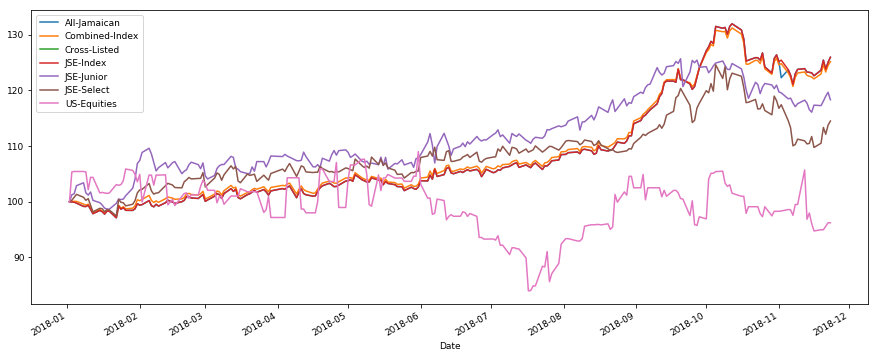

In [82]:
#ind_returns['All-Jamaican'].plot()
plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 9})
#plt.show()
(df_ind_data / df_ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()


In [83]:
#indicies Annual Rate of Return
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

All-Jamaican      0.262563
Combined-Index    0.254215
Cross-Listed           NaN
JSE-Index         0.262296
JSE-Junior        0.198288
JSE-Select        0.162811
US-Equities       0.017508
dtype: float64

<h3> Analysis for Jamaia Stocks </h3>

In [84]:
rate_return = (stkframe/stkframe.shift(1))-1
rate_return.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005639,0.000000,0.152896,0.006897,0.062918,0.0,0.058824,0.000000,0.001754,0.0,...,-0.005088,NaN,0.056250,0.0,NaN,0.102339,-0.056604,0.089286,-0.046900,0.043847
2018-01-04,0.033396,0.000000,0.000000,-0.006849,0.001259,0.0,0.001111,0.000000,0.000000,0.0,...,-0.012500,NaN,-0.013807,0.0,NaN,0.060124,0.000000,0.016393,-0.045872,0.014228
2018-01-05,0.025000,-0.015385,0.000000,0.000000,0.000000,0.0,-0.001110,0.123077,0.000876,0.0,...,0.006617,NaN,0.002000,0.0,NaN,-0.009174,0.000000,-0.046083,-0.076049,-0.028724
2018-01-08,0.000000,0.023438,0.023810,0.006897,0.080503,0.0,-0.002778,0.191781,-0.007874,0.0,...,-0.004001,NaN,0.000000,0.0,NaN,0.007576,0.015385,-0.026570,-0.047304,-0.002751


In [85]:
rate_return = rate_return.replace([np.inf, -np.inf], np.nan)
rate_return.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005639,0.000000,0.152896,0.006897,0.062918,0.0,0.058824,0.000000,0.001754,0.0,...,-0.005088,NaN,0.056250,0.0,NaN,0.102339,-0.056604,0.089286,-0.046900,0.043847
2018-01-04,0.033396,0.000000,0.000000,-0.006849,0.001259,0.0,0.001111,0.000000,0.000000,0.0,...,-0.012500,NaN,-0.013807,0.0,NaN,0.060124,0.000000,0.016393,-0.045872,0.014228
2018-01-05,0.025000,-0.015385,0.000000,0.000000,0.000000,0.0,-0.001110,0.123077,0.000876,0.0,...,0.006617,NaN,0.002000,0.0,NaN,-0.009174,0.000000,-0.046083,-0.076049,-0.028724
2018-01-08,0.000000,0.023438,0.023810,0.006897,0.080503,0.0,-0.002778,0.191781,-0.007874,0.0,...,-0.004001,NaN,0.000000,0.0,NaN,0.007576,0.015385,-0.026570,-0.047304,-0.002751


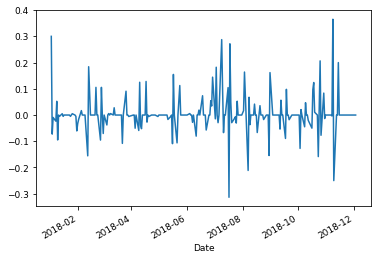

<Figure size 2400x1200 with 0 Axes>

In [86]:
#Sample of rate of return
rate_return['PULS'].plot()
plt.figure(figsize=(30,15), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 4})
plt.show()

[]

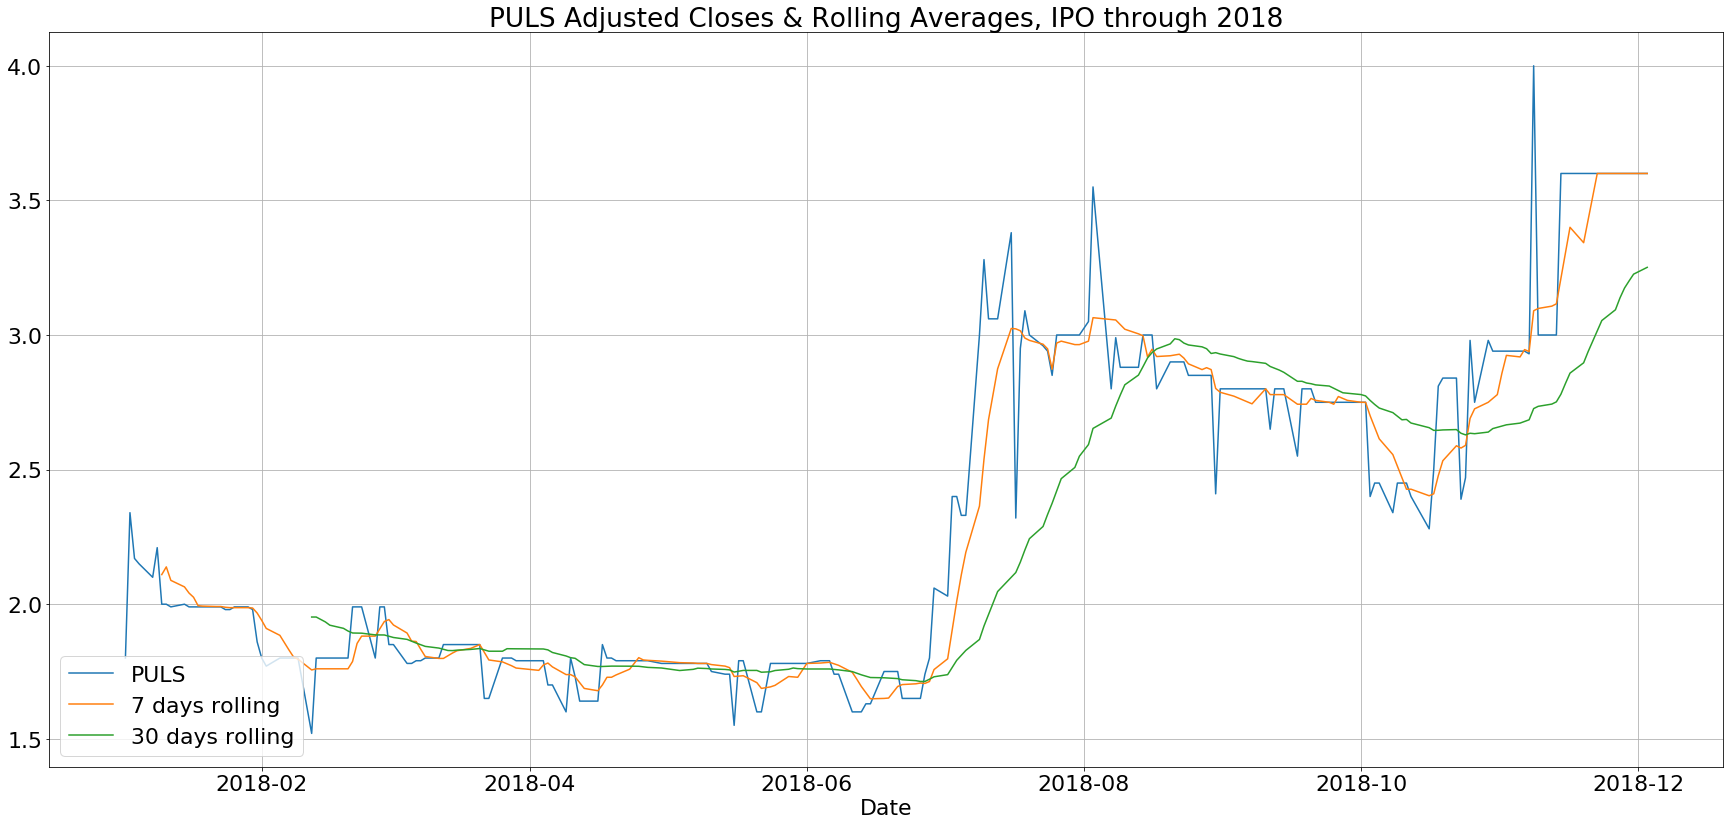

In [87]:

sym = 'PULS'

df_closing = stkframe[sym]
df_7days = df_closing.rolling( 7 ).mean()
df_30days = df_closing.rolling( 30 ).mean()

fig = plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 22})
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
ax.plot(df_closing.index, df_closing, label=sym)
ax.plot(df_7days.index, df_7days, label='7 days rolling')
ax.plot(df_30days.index, df_30days, label='30 days rolling')
ax.grid()
ax.legend(loc=3)
ax.set_xlabel('Date')
plt.title(sym+' Adjusted Closes & Rolling Averages, IPO through 2018')
plt.plot()

In [88]:
stkframe['2018-07-01':'2018-09-30']['CAR']

Date
2018-07-02     9.80
2018-07-03     9.72
2018-07-04     9.98
2018-07-05     9.85
2018-07-06    10.00
2018-07-09     9.58
2018-07-10     9.50
2018-07-11     9.50
2018-07-12     9.45
2018-07-13     9.47
2018-07-16     9.50
2018-07-17     9.49
2018-07-18     9.49
2018-07-19     9.45
2018-07-20     9.45
2018-07-23     9.03
2018-07-24     9.13
2018-07-25     9.33
2018-07-26     9.10
2018-07-27     9.42
2018-07-30     9.29
2018-07-31     9.30
2018-08-02     9.44
2018-08-03     9.19
2018-08-07     9.14
2018-08-08     9.19
2018-08-09     9.11
2018-08-10     9.16
2018-08-13     9.17
2018-08-14     9.02
              ...  
2018-08-20     9.00
2018-08-21     8.91
2018-08-22     8.98
2018-08-23     9.00
2018-08-24     9.00
2018-08-27     8.97
2018-08-28     9.00
2018-08-29     9.20
2018-08-30     9.09
2018-08-31     9.12
2018-09-03     9.47
2018-09-04     9.44
2018-09-05     9.50
2018-09-06     9.50
2018-09-07     9.50
2018-09-10     9.48
2018-09-11     9.13
2018-09-12     9.02
2018-09-13     

In [89]:
#Calculate the Average Rate of Return
avg_returns = round(rate_return.mean() * 250,5) * 100
# Drop all records with no application
avg_returns = avg_returns.dropna()
# Drop all record with 0 as rate of return
avg_returns = avg_returns.drop(avg_returns[avg_returns == 0].index)
avg_returns[avg_returns > 0].sort_values()

LASF          0.298
1834          3.802
DCOVE         6.874
LASM          7.831
JAMT          8.094
ProvenJA      8.639
MJE           9.359
LASD         16.605
SGJ          17.865
SSLVC        18.289
BRG          18.775
SEP          21.391
KREMI        29.450
CHL          32.342
GK           33.644
JSE          35.012
MEEG         35.070
ROC          35.955
CPJ          37.992
SJ           40.822
PURITY       42.908
GENAC        47.219
AFS          47.753
CCC          49.053
JMMBGL       50.978
FOSRICH      51.257
NCBFG        52.065
MDS          54.975
JP           55.008
PJAM         55.386
KLE          58.959
BPOW         64.706
ISP          65.298
KEY          65.391
SVL          67.396
SOS          70.412
JBG          70.936
CFF          73.981
ELITE        76.884
MIL          79.848
ECL          99.107
KW          100.557
SIL         119.478
CAC         124.535
SALF        130.933
PULS        138.507
PAL         150.979
BIL         166.296
DTL         180.639
MUSIC       235.993


In [90]:
#find the stocks that have split
avg_returns[avg_returns <= 0].sort_values()

EFRESH    -94.298
GWEST     -75.489
SCIJMD    -75.213
138SL     -51.311
AMG       -36.751
SCIJA     -35.820
PJX       -19.158
CAR       -15.906
SML       -14.862
WISYNCO   -14.632
KPREIT    -13.443
JETCON    -11.825
EPLY      -11.308
SRA        -9.758
TTECH      -9.122
RJR        -8.497
KEX        -7.562
HONBUN     -5.536
VMIL       -4.169
XFUND      -3.618
PTL        -3.316
CBNY       -0.040
dtype: float64

In [91]:
#%load?

<h2> Portfolio Assessment </h2>

In [92]:
value = stkframe.count(axis=0)
value = value.index[stkframe.count(axis=0) == stkframe['CAR'].count()]
value

Index(['CCC', '1834', 'AFS', 'AMG', 'BIL', 'BPOW', 'BRG', 'CAC', 'CAR', 'CBNY',
       '138SL', 'CFF', 'CHL', 'CPJ', 'DCOVE', 'DTL', 'ECL', 'EPLY', 'FOSRICH',
       'GENAC', 'GK', 'GWEST', 'HONBUN', 'ISP', 'JAMT', 'JBG', 'JETCON',
       'JMMBGL', 'JP', 'JSE', 'KEX', 'KEY', 'KLE', 'KPREIT', 'KREMI', 'KW',
       'LASD', 'LASF', 'LASM', 'MDS', 'MEEG', 'MIL', 'NCBFG', 'PAL', 'PJAM',
       'PJX', 'PTL', 'PULS', 'PURITY', 'ProvenJA', 'RJR', 'ROC', 'SALF', 'SEP',
       'SGJ', 'SIL', 'SJ', 'SOS', 'SRA', 'SVL', 'TTECH', 'VMIL', 'WISYNCO',
       'XFUND'],
      dtype='object')

In [93]:
#Porfolio
selectStock = []
for i in range(0,6):
    rand_indx = np.random.randint(len(value))
    selectStock.append(value[rand_indx])

selectStock

['LASD', 'JP', 'WISYNCO', 'AFS', 'SIL', 'KPREIT']

C:\Users\Romayne\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


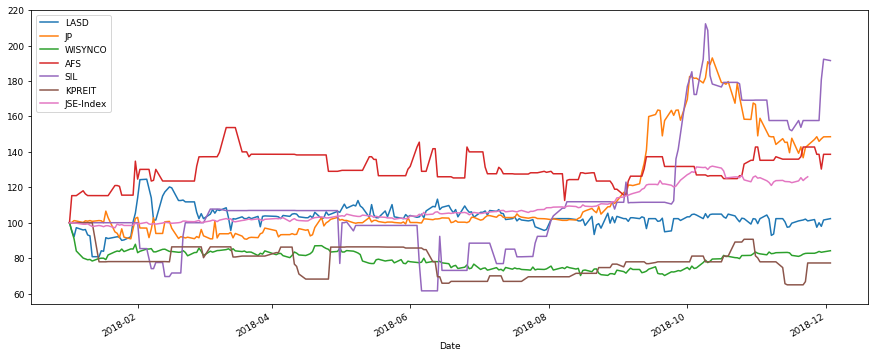

In [99]:
portfolio_compare = pd.DataFrame
portfolio_compare = stkframe[selectStock]
portfolio_compare['JSE-Index'] = df_ind_data['JSE-Index']
(portfolio_compare / portfolio_compare.iloc[0] * 100).plot(figsize = (15, 6));
plt.rcParams.update({'font.size': 9})
plt.show() 
#df_ind_data['JSE-Index']
#portfolio_compare[selectStock].tail()

In [95]:
weights = np.array([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [96]:
portfolio = str(round(np.dot(avg_returns[selectStock], weights),2)) + "%"
portfolio

'35.14%'